<a href="https://colab.research.google.com/github/gabrielacaesar/lgbt_casamento/blob/main/isabela_qual_uf_mais_casamentos_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estatísticas básicas por UF sobre casamentos LGBTs

Qual foi a UF que teve mais casamentos em 2019?

In [23]:
import pandas as pd
from datetime import datetime
import seaborn as sns

In [24]:
lgbt_casamento = pd.read_csv('lgbt_casamento.csv')
lgbt_casamento.head(2)

,ano,uf,genero,mes,numero
0,2014,Rondônia,Masculino,Janeiro,0
1,2014,Rondônia,Masculino,Fevereiro,0


In [25]:
sigla_uf = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/estados.csv')

In [26]:
sigla_uf_lgbt_casamento = lgbt_casamento.merge(sigla_uf, how = 'left', left_on = 'uf', right_on = 'nome')
len(sigla_uf_lgbt_casamento['uf_y'].unique())
sigla_uf_lgbt_casamento.head(2)

,ano,uf_x,genero,mes,numero,codigo_uf,uf_y,nome,latitude,longitude
0,2014,Rondônia,Masculino,Janeiro,0,11,RO,Rondônia,-10.83,-63.34
1,2014,Rondônia,Masculino,Fevereiro,0,11,RO,Rondônia,-10.83,-63.34


In [27]:
meses = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}

In [28]:
sigla_uf_lgbt_casamento['mes'] = sigla_uf_lgbt_casamento['mes'].apply(lambda x: meses[x])

In [29]:
sigla_uf_lgbt_casamento['data'] = pd.to_datetime(sigla_uf_lgbt_casamento['mes'].astype(str) + '-' + sigla_uf_lgbt_casamento['ano'].astype(str))

In [30]:
df2 = sigla_uf_lgbt_casamento.groupby(['data', 'uf_x']).agg({'numero': 'sum'})
df2.head(10)

numero
data       uf_x                    
2013-01-01 Acre                   0
           Alagoas                0
           Amapá                  0
           Amazonas               0
           Bahia                  5
           Ceará                  8
           Distrito Federal       2
           Espírito Santo         0
           Goiás                  0
           Maranhão               0

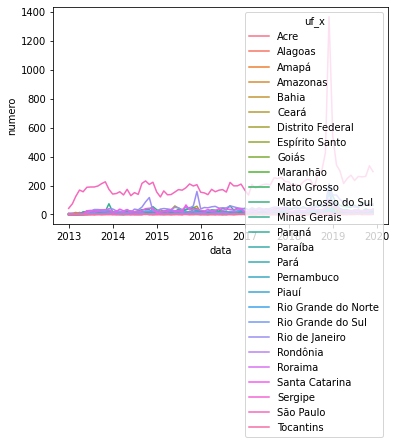

In [36]:
sns.lineplot(data=df2, x="data", y="numero", hue="uf_x")

Resposta: São Paulo em 2019